In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Lendo a base e guardando na variável df

df = pd.read_csv('Consumo_cerveja.csv')

In [3]:
# Printando o dataframe

df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Pegando informações do data frame
# Perceba que há 365 valores não nulos em todas as colunas. Porém o dataframe possui 941 linhas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
# Vamos pegar o dataframe a partir da linha 365 e utilizara novamente o método .info()
# Perceba que a partir da linha 365 todos os valores são nulos em todas as colunas.
# Logo iremos retirar do data frame essas linhas

df[365:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 365 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         0 non-null      object 
 1   Temperatura Media (C)        0 non-null      object 
 2   Temperatura Minima (C)       0 non-null      object 
 3   Temperatura Maxima (C)       0 non-null      object 
 4   Precipitacao (mm)            0 non-null      object 
 5   Final de Semana              0 non-null      float64
 6   Consumo de cerveja (litros)  0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 31.6+ KB


In [6]:
# Dropando todas as linhas nulas do dataframe e printando novamente o dataframe
# O argumento 'inplace = True' torna desnecessário criar um novo dataframe

df.dropna(inplace = True)

df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [7]:
# Vamos fazer um group by na coluna 'Final de Semana' para ver a quantidade e os valores que essa coluna assume
df.groupby('Final de Semana').size().reset_index(name='Quantidade')

,Final de Semana,Quantidade
0,0.0,261
1,1.0,104


In [8]:
# Perceba que os Dtype estão como:

 # Coluna                         Dtype  

 # Data                           object 
 # Temperatura Media (C)          object 
 # Temperatura Minima (C)         object 
 # Temperatura Maxima (C)         object 
 # Precipitacao (mm)              object 
 # Final de Semana                float64
 # Consumo de cerveja (litros)    float64

# Vamos tranformar os valores das colunas de Temperatura Media (C), Temperatura Minima (C), Temperatura Maxima (C)
# e Precipitacao (mm) em float64

# Se utilizássemos o método .astype('float64') daria erro pois os valores estão separdos por vírgula
# Exemplo: 27,3
# O correto deveria ser 27.3
# O código abaixo faz essa conversão

# A coluna 'Final de Semana' assume valores 0 ou 1. Logo iremos colocar essa variável como categórica

df['Temperatura Media (C)'] = pd.to_numeric(df['Temperatura Media (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Minima (C)'] = pd.to_numeric(df['Temperatura Minima (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Maxima (C)'] = pd.to_numeric(df['Temperatura Maxima (C)'].str.replace(',', '.'), errors='coerce')
df['Precipitacao (mm)'] = pd.to_numeric(df['Precipitacao (mm)'].str.replace(',', '.'), errors='coerce')
df['Final de Semana'] = df['Final de Semana'].astype('category')

In [9]:
# Printando o tipo das colunas e as primeiras linhas

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Data                         365 non-null    object  
 1   Temperatura Media (C)        365 non-null    float64 
 2   Temperatura Minima (C)       365 non-null    float64 
 3   Temperatura Maxima (C)       365 non-null    float64 
 4   Precipitacao (mm)            365 non-null    float64 
 5   Final de Semana              365 non-null    category
 6   Consumo de cerveja (litros)  365 non-null    float64 
dtypes: category(1), float64(5), object(1)
memory usage: 20.4+ KB


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [10]:
# Vamos dividir a base em treino e teste antes da análise exploratória para não se tomar alguma decisão
# baseado nos dados de teste

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
# Fazendo uma análise rápida das variáveis contínuas float64

train_data.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
count,292.000000,292.000000,292.000000,292.000000,292.000000
mean,21.103699,17.317466,26.461986,5.161301,25.173113
std,3.232581,2.882571,4.348546,12.160690,4.288006
min,12.900000,10.600000,14.500000,0.000000,14.343000
25%,18.735000,15.175000,23.675000,0.000000,22.026000
50%,21.260000,17.600000,26.600000,0.000000,24.704500
75%,23.145000,19.500000,29.225000,3.400000,28.406500
max,28.860000,24.500000,36.500000,85.300000,37.690000


In [12]:
# Fazendo um count da variável categórica 'Final de Semana'

train_data['Final de Semana'].value_counts()

0.0    216
1.0     76
Name: Final de Semana, dtype: int64

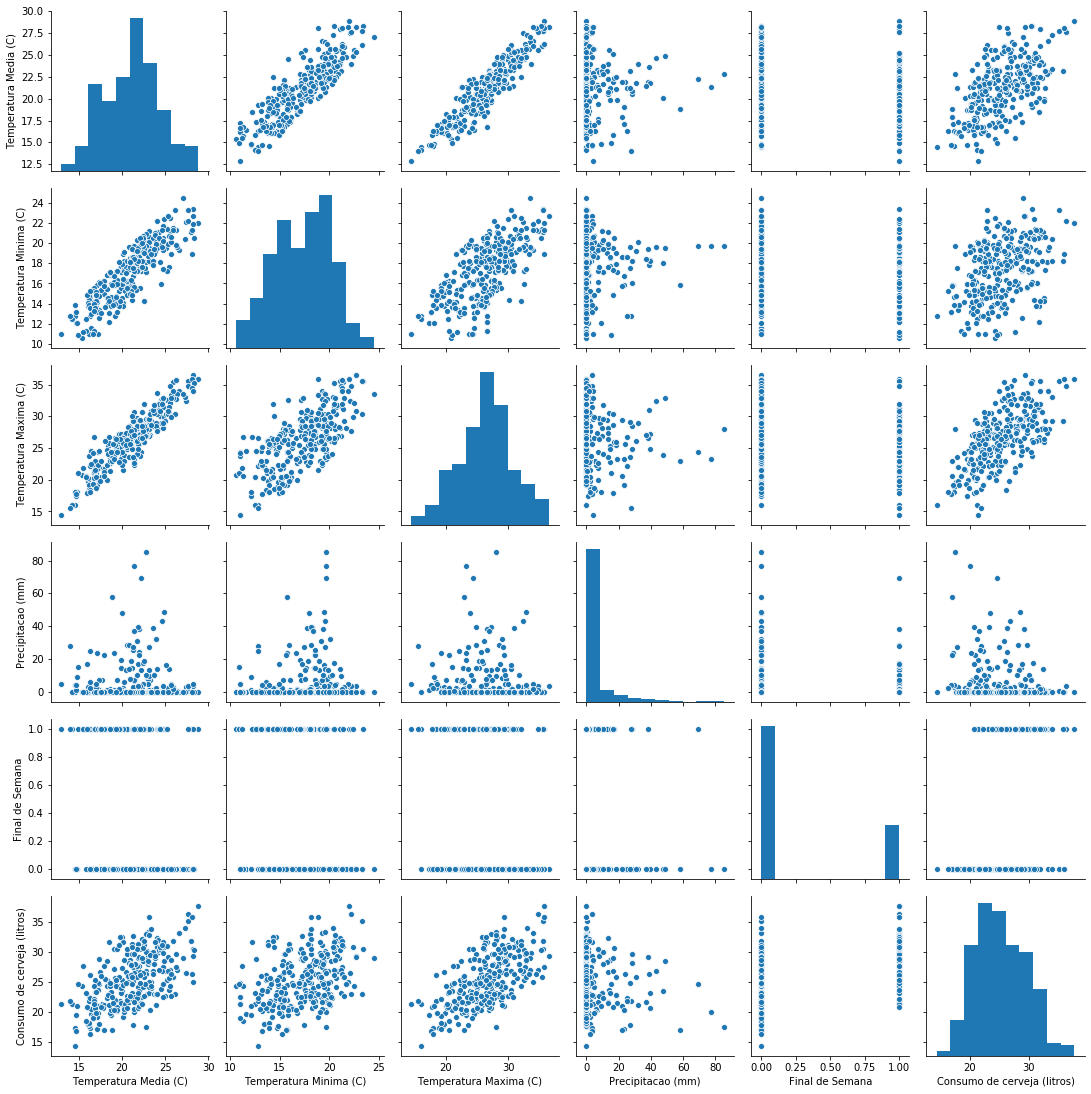

In [13]:
# Fazendo um pairplot entre as variáveis do dataframe.

# Perceba que, em relação ao consumo de cerveja, há relações lineares entre as Temperaturas Média, Mínima e Máxima.
# Em relação a Precipitacao (mm) podemos considerar que quanto menos precipitação, maior a frequência de consumo de cerveja
# e maior também os valores desse consumo
# Podemos notar também que o consumo de cerveja descreve uma distribuição aproximadamente normal com uma média de ~25 litros


sns.pairplot(train_data, aspect=1)

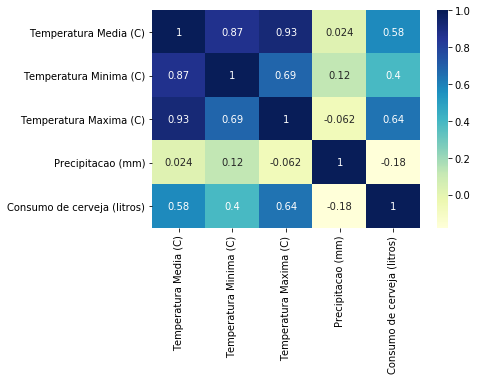

In [14]:
# Fazendo o plot da matriz de correlação entre as variáveis contínuas

correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")